In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms

from simtorch.model.sim_model import SimilarityModel
from simtorch.similarity import CKA, DeltaCKA

/u/73/kumary1/unix/anaconda3/envs/simtorch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model1 = torchvision.models.densenet121(pretrained=True)
model2 = torchvision.models.resnet101(pretrained=True)

/u/73/kumary1/unix/anaconda3/envs/simtorch/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/u/73/kumary1/unix/anaconda3/envs/simtorch/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/u/73/kumary1/unix/anaconda3/envs/simtorch/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights

In [3]:
sim_model1 = SimilarityModel(
    model1, model_name="DenseNet 121", layers_to_include=["conv", "classifier",], device="cuda")
sim_model2 = SimilarityModel(
    model2, model_name="ResNet 101", layers_to_include=["conv", "fc",], device="cuda")

In [18]:
train_kwargs = {"batch_size": 1024}

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset1 = datasets.CIFAR10("../data", train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1, **train_kwargs)

Files already downloaded and verified


In [11]:
sim_cka = CKA(sim_model1, sim_model2, device="cuda")

cka_matrix = sim_cka.compute(train_loader)

100%|██████████| 20/20 [03:22<00:00, 10.14s/it]


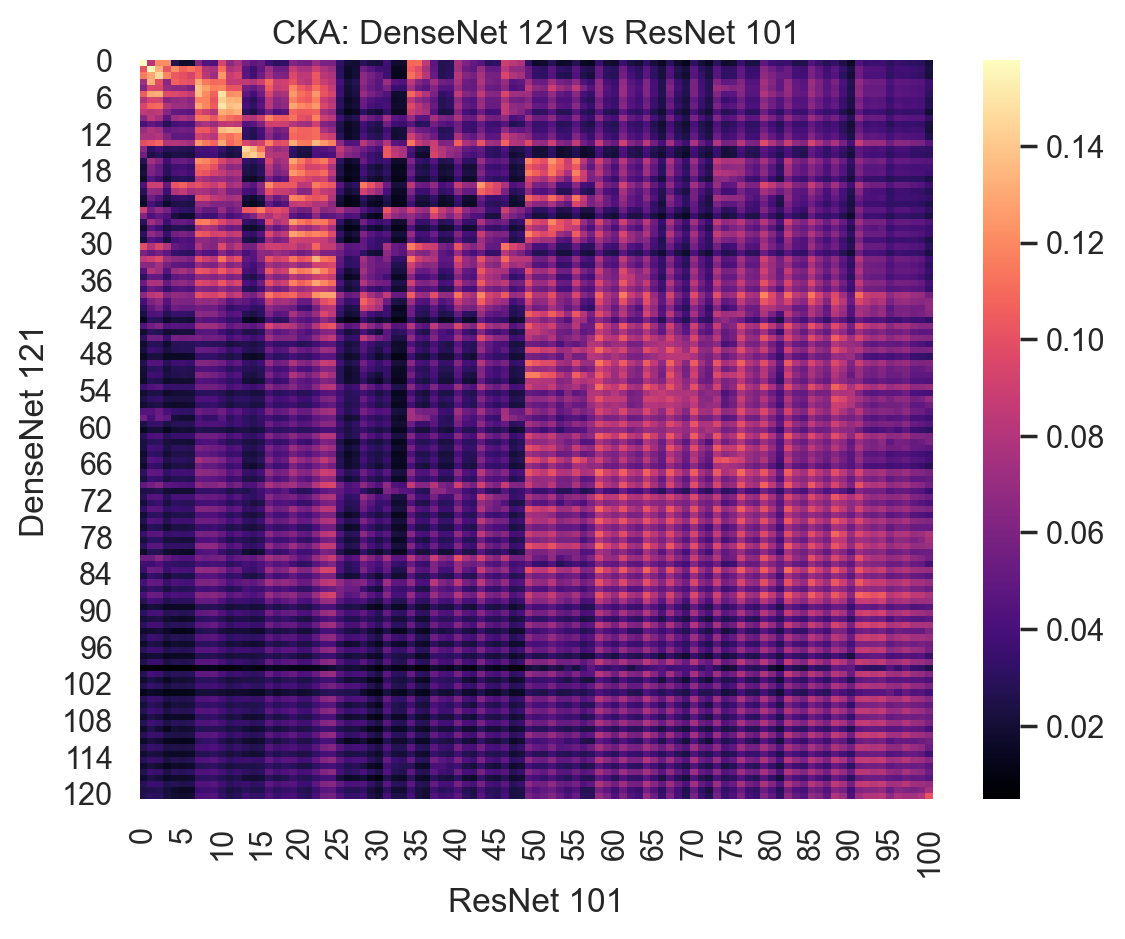

In [12]:
sim_cka.plot_similarity()

In [7]:
sim_dcka = DeltaCKA(sim_model1, sim_model1, device="cuda")

dcka_matrix = sim_dcka.compute(train_loader)

100%|██████████| 20/20 [00:26<00:00,  1.34s/it]


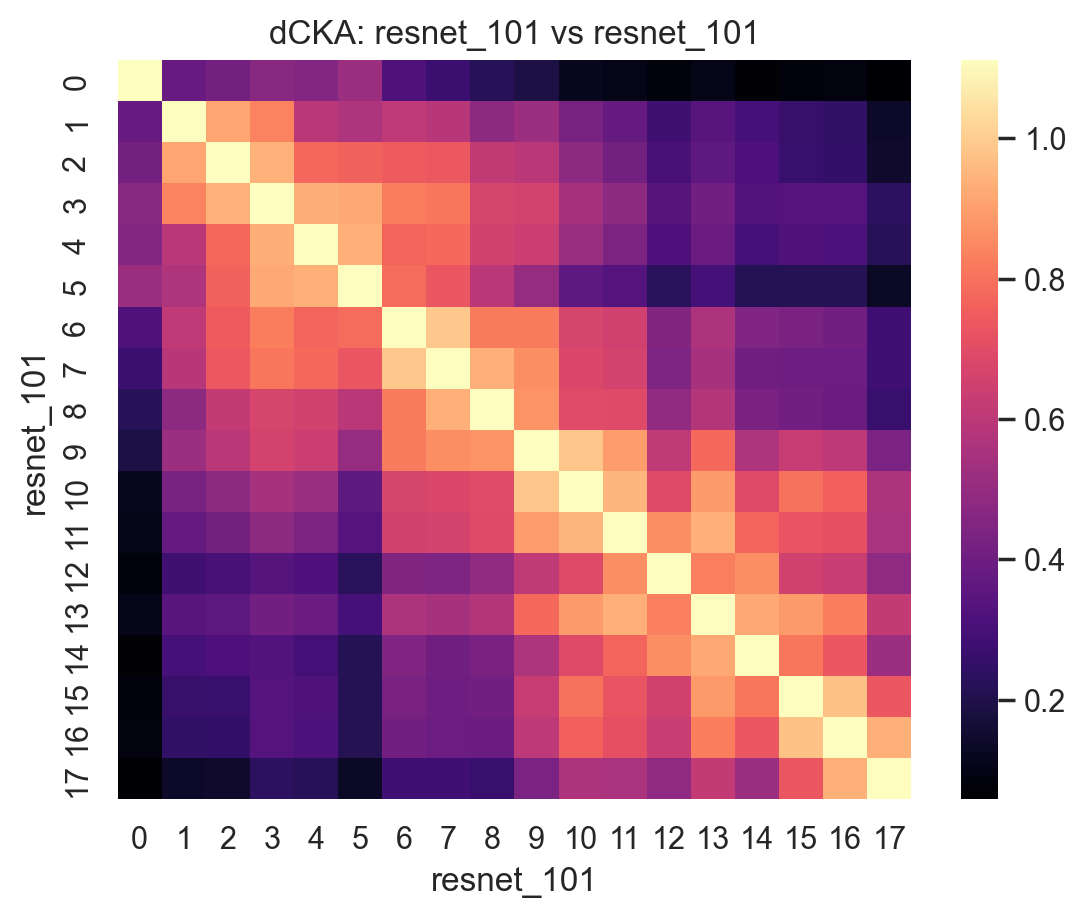

In [8]:
sim_dcka.plot_similarity()